# Part 1  - Identify the Frauds with the Self-Organizing Map

# Importing the Packages

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
% matplotlib inline

# Importing the Dataset

In [4]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
X = sc.fit_transform(X)
X

array([[  8.42681467e-01,   1.00000000e+00,   1.25263158e-01, ...,
          5.00000000e-01,   5.00000000e-02,   1.21200000e-02],
       [  6.96090562e-01,   0.00000000e+00,   1.34135338e-01, ...,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  3.88981656e-01,   0.00000000e+00,   2.38045113e-01, ...,
          5.00000000e-01,   1.40000000e-01,   0.00000000e+00],
       ..., 
       [  4.39420332e-01,   0.00000000e+00,   7.63909774e-02, ...,
          5.00000000e-01,   5.00000000e-02,   0.00000000e+00],
       [  8.44034934e-01,   0.00000000e+00,   2.05563910e-01, ...,
          5.00000000e-01,   6.00000000e-02,   1.10000000e-04],
       [  1.06907888e-01,   1.00000000e+00,   4.09774436e-01, ...,
          0.00000000e+00,   2.80000000e-01,   0.00000000e+00]])

# Training the SOM

In [9]:
from minisom import MiniSom

In [14]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the Results

In [15]:
from pylab import bone, pcolor, colorbar, plot, show

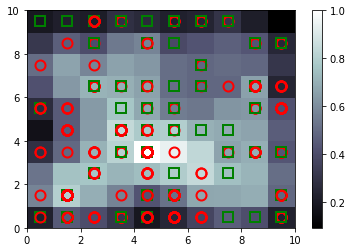

In [16]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# Finding the Frauds

In [18]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

array([[  1.56946660e+07,   0.00000000e+00,   2.65000000e+01,
          2.71000000e+00,   1.00000000e+00,   8.00000000e+00,
          4.00000000e+00,   8.50000000e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   8.00000000e+01,   1.00000000e+00],
       [  1.57311660e+07,   1.00000000e+00,   4.09200000e+01,
          8.35000000e-01,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.30000000e+02,   2.00000000e+00],
       [  1.56493790e+07,   1.00000000e+00,   4.27500000e+01,
          3.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.01000000e+02],
       [  1.55872970e+07,   1.00000000e+00,   1.84200000e+01,
     

# Part 2 - Going from Unsupervised to Supervised Deep Learning

# Creating the Matrix of Features

In [19]:
customers = dataset.iloc[:, :-1].values

# Creating the Dependent Variable

In [20]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
customers = sc.fit_transform(customers)
customers

array([[ 1.19915887,  0.68873723, -0.80105183, ...,  0.23782765,
        -0.48835847,  0.03738039],
       [ 0.68683384, -1.45193254, -0.75124044, ...,  0.23782765,
        -0.13959116, -0.19541334],
       [-0.38649046, -1.45193254, -0.16785619, ...,  0.23782765,
         0.55794344, -0.19541334],
       ..., 
       [-0.21021079, -1.45193254, -1.07543661, ...,  0.23782765,
        -0.48835847, -0.19541334],
       [ 1.20388914, -1.45193254, -0.35021653, ...,  0.23782765,
        -0.3721027 , -0.19330052],
       [-1.37231869,  0.68873723,  0.79628971, ..., -3.11117398,
         2.18552419, -0.19541334]])

# Part 3 - Making the ANN

# Importing the Keras Libraries and Packages

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Initialising the ANN

In [25]:
classifier = Sequential()

# Adding the Input Layer and the First Hidden Layer

In [26]:
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the Output Layer

In [27]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN

In [28]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training Set

In [29]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s - loss: 0.4742 - acc: 0.9696     
Epoch 2/2
690/690 [==============================] - 0s - loss: 0.1637 - acc: 0.9710     


# Predicting the Probabilities of Frauds

In [30]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[  1.56214230e+07,   5.23998495e-03],
       [  1.56058720e+07,   8.35768692e-03],
       [  1.57635790e+07,   1.06420182e-02],
       ..., 
       [  1.56585040e+07,   2.33916953e-01],
       [  1.57723290e+07,   2.59066105e-01],
       [  1.55988020e+07,   3.34660381e-01]])